In [45]:
def load_data():
    import sklearn.datasets as datasets
    d = datasets.load_iris()
    c = pandas.Categorical.from_codes(d.target, d.target_names)
    df = pandas.DataFrame(d.data, columns=d.feature_names)
    df['name'] = c
    df = df.sort_index(axis=1)
    dfd = pandas.get_dummies(df)
    return df, dfd

df, dfd = load_data()
print(dfd.shape)

(150, 7)


In [47]:
df.head()

,name,petal length (cm),petal width (cm),sepal length (cm),sepal width (cm)
0,setosa,1.4,0.2,5.1,3.5
1,setosa,1.4,0.2,4.9,3.0
2,setosa,1.3,0.2,4.7,3.2
3,setosa,1.5,0.2,4.6,3.1
4,setosa,1.4,0.2,5.0,3.6


/Users/davidcottrell/anaconda/envs/34/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


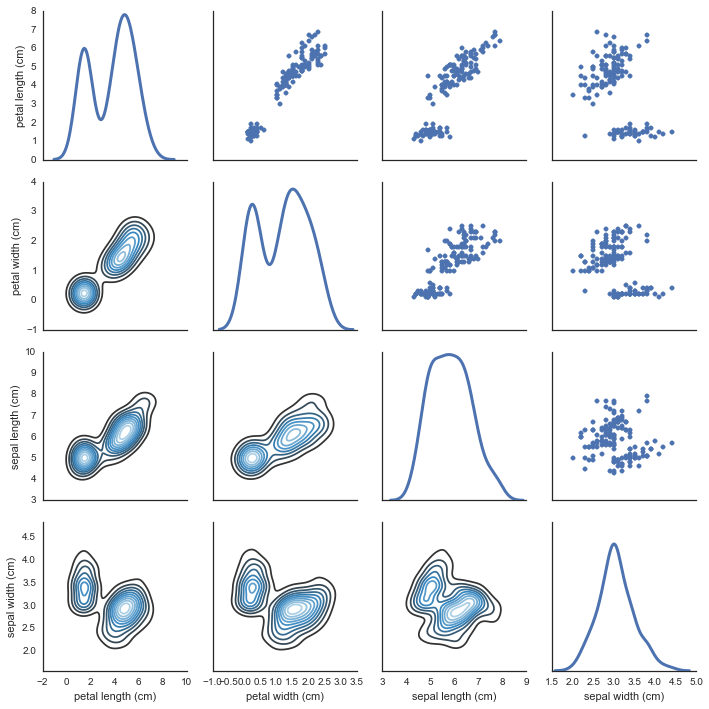

In [48]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")

g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [49]:
from sklearn.cross_validation import train_test_split

In [74]:
y_cols = ['petal length (cm)']
x_cols = [x for x in dfd.columns if x not in y_cols]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(dfd[x_cols].values, dfd[y_cols].values, test_size=0.1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(135, 6) (135, 1) (15, 6) (15, 1)


In [90]:
SGD?

In [130]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

m = X_train.shape[1]
n = y_train.shape[1]

dims = [100, 100, 100]
dropout = 0.5

model = Sequential()
model.add(Dense(m, dims[0], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(dims[0], dims[1], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(dims[1], dims[2], init='glorot_uniform'))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(dims[2], n, init='glorot_uniform'))
model.add(Activation('linear'))

sgd = SGD(lr=0.025, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)

Train on 135 samples, validate on 15 samples
Epoch 1/1000
135/135 [==============================] - 0s - loss: 8.0892 - acc: 1.0000 - val_loss: 2.4238 - val_acc: 1.0000
Epoch 2/1000
135/135 [==============================] - 0s - loss: 2.9299 - acc: 1.0000 - val_loss: 1.8868 - val_acc: 1.0000
Epoch 3/1000
135/135 [==============================] - 0s - loss: 2.9059 - acc: 1.0000 - val_loss: 1.4872 - val_acc: 1.0000
Epoch 4/1000
135/135 [==============================] - 0s - loss: 2.4929 - acc: 1.0000 - val_loss: 1.3151 - val_acc: 1.0000
Epoch 5/1000
135/135 [==============================] - 0s - loss: 2.0926 - acc: 1.0000 - val_loss: 0.3513 - val_acc: 1.0000
Epoch 6/1000
135/135 [==============================] - 0s - loss: 0.9489 - acc: 1.0000 - val_loss: 0.7928 - val_acc: 1.0000
Epoch 7/1000
135/135 [==============================] - 0s - loss: 1.1631 - acc: 1.0000 - val_loss: 0.3652 - val_acc: 1.0000
Epoch 8/1000
135/135 [==============================] - 0s - loss: 1.0679 - acc:

In [137]:
out = model.fit(X_train, y_train, nb_epoch=1000, batch_size=30, validation_data=(X_test, y_test), show_accuracy=True)

Train on 135 samples, validate on 15 samples
Epoch 1/1000
135/135 [==============================] - 0s - loss: 0.1597 - acc: 1.0000 - val_loss: 0.0639 - val_acc: 1.0000
Epoch 2/1000
135/135 [==============================] - 0s - loss: 0.1927 - acc: 1.0000 - val_loss: 0.1071 - val_acc: 1.0000
Epoch 3/1000
135/135 [==============================] - 0s - loss: 0.1842 - acc: 1.0000 - val_loss: 0.0544 - val_acc: 1.0000
Epoch 4/1000
135/135 [==============================] - 0s - loss: 0.1767 - acc: 1.0000 - val_loss: 0.0844 - val_acc: 1.0000
Epoch 5/1000
135/135 [==============================] - 0s - loss: 0.1925 - acc: 1.0000 - val_loss: 0.0904 - val_acc: 1.0000
Epoch 6/1000
135/135 [==============================] - 0s - loss: 0.1868 - acc: 1.0000 - val_loss: 0.0485 - val_acc: 1.0000
Epoch 7/1000
135/135 [==============================] - 0s - loss: 0.1757 - acc: 1.0000 - val_loss: 0.1446 - val_acc: 1.0000
Epoch 8/1000
135/135 [==============================] - 0s - loss: 0.1740 - acc:

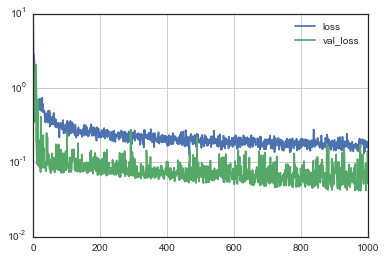

In [131]:
h = pandas.DataFrame(out.history)
h[['loss', 'val_loss']].plot(logy=True)
grid()

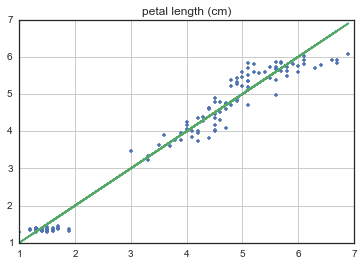

In [132]:
def do_pred_plot(X, y):
    pred = model.predict(X)
    %matplotlib inline
    for i in range(pred.shape[1]):
        figure()
        clf()
        plot(y[:,i], pred[:,i], '.')
        plot(y[:,i], y[:,i], '-')
        title(dfd.columns[i])
        grid()
        
do_pred_plot(X_train, y_train)

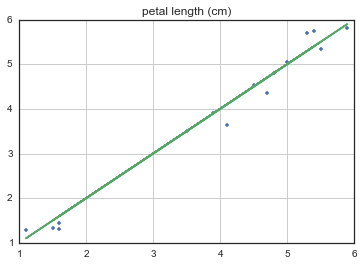

In [133]:
do_pred_plot(X_test, y_test)

In [30]:
model.save_weights('iris_weights.h5', overwrite=True)

In [31]:
w = model.get_weights()

In [32]:
for x in w:
    print(x.shape)

(7, 100)
(100,)
(100, 2)
(2,)
(2, 25)
(25,)
(25, 7)
(7,)
